<a href="https://colab.research.google.com/github/divyat-thv/Codveda1/blob/main/regression_stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the uploaded stock prices dataset
df = pd.read_csv('2) Stock Prices Data Set.csv')

# Show the first few rows
print(df.head())

# Check the column names and types
print(df.info())


  symbol        date      open      high       low     close      volume
0    AAL  2014-01-02   25.0700   25.8200   25.0600   25.3600   8998943.0
1   AAPL  2014-01-02   79.3828   79.5756   78.8601   79.0185  58791957.0
2    AAP  2014-01-02  110.3600  111.8800  109.2900  109.7400    542711.0
3   ABBV  2014-01-02   52.1200   52.3300   51.5200   51.9800   4569061.0
4    ABC  2014-01-02   70.1100   70.2300   69.4800   69.8900   1148391.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43224 entries, 0 to 43223
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  43224 non-null  object 
 1   date    43224 non-null  object 
 2   open    43224 non-null  float64
 3   high    43224 non-null  float64
 4   low     43224 non-null  float64
 5   close   43224 non-null  float64
 6   volume  43223 non-null  float64
dtypes: float64(5), object(2)
memory usage: 2.3+ MB
None


R² Score: 0.9968
Mean Squared Error: 1.8421


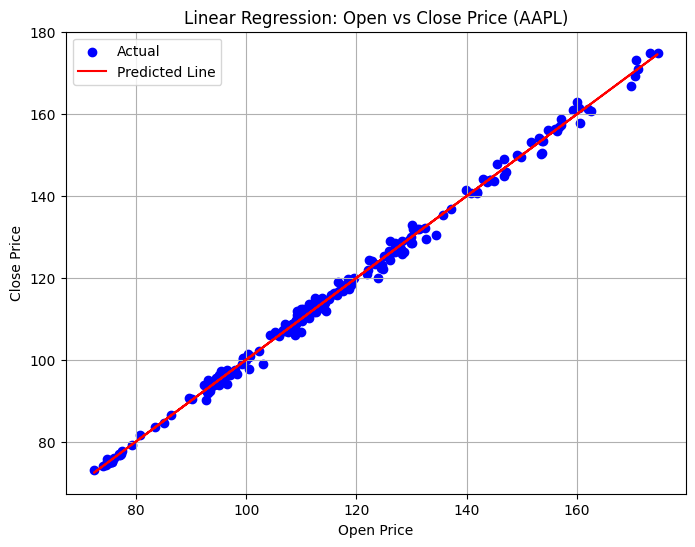

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv('2) Stock Prices Data Set.csv')

# Drop missing values in case volume has any
df.dropna(inplace=True)

# Select only one company to avoid mixing prices (e.g., AAPL)
df_aapl = df[df['symbol'] == 'AAPL']

# Define X and y
X = df_aapl[['open']]  # independent variable
y = df_aapl['close']   # dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Linear Regression: Open vs Close Price (AAPL)')
plt.legend()
plt.grid(True)
plt.show()
